In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import math

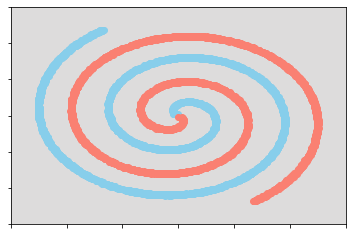

In [258]:
n = 3000

def twospirals(n_samples, noise=.2):
    
    
    n = np.sqrt(np.random.rand(n_samples,1)) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_samples,1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_samples,1) * noise
    return (np.vstack((np.hstack((d1x,d1y)),np.hstack((-d1x,-d1y)))), 
            np.hstack((np.zeros(n_samples),np.ones(n_samples))))


X, Y = twospirals(n)

X0 = np.array(np.sin(X[:, 0])).T
X1 = np.array(np.sin(X[:, 1])).T
X = np.array([X[:, 0], X[:, 1], X0, X1]).T

res = 200

_x0 = np.linspace(-15, 15, res)
_x1 = np.linspace(-15, 15, res)

_pX = np.array(np.meshgrid(_x0, _x1)).T.reshape(-1, 2)

_pX0 = np.array(np.sin(_pX[:, 0])).T
_pX1 = np.array(np.sin(_pX[:, 1])).T
_pX = np.array([_pX[:, 0], _pX[:, 1], _pX0, _pX1]).T

_pY = np.zeros((res, res)) + 0.5

plt.pcolormesh(_x0, _x1, _pY, cmap="coolwarm", vmin=0, vmax=1)
plt.scatter(X[Y[:]==0,0], X[Y[:]==0,1], c="skyblue")
plt.scatter(X[Y[:]==1,0], X[Y[:]==1,1], c="salmon")
plt.tick_params(labelbottom= False, labelleft= False)
plt.show()

In [3]:
from matplotlib import animation
from IPython.core.display import display, HTML
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


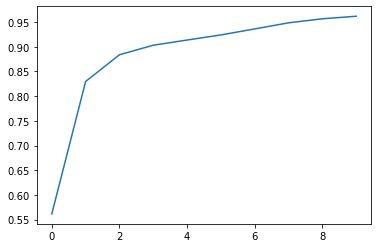

In [277]:
nn = [4, 30, 16, 1]
lr = 0.03

iX = tf.placeholder('float', shape= [None, X.shape[1]])
iY = tf.placeholder('float', shape= [None])

#Capa 1

W1 = tf.Variable(tf.random.normal([nn[0], nn[1]]), name = 'Weights_1')
b1 = tf.Variable(tf.random.normal([nn[1]]), name = 'bias_1')

l1 = tf.nn.tanh(tf.add(tf.matmul(iX, W1), b1))

#Capa 2

W2 = tf.Variable(tf.random.normal([nn[1], nn[2]]), name = 'Weights_2')
b2 = tf.Variable(tf.random.normal([nn[2]]), name = 'bias_2')

l2 = tf.nn.tanh(tf.add(tf.matmul(l1, W2), b2))

#Capa 3

W3 = tf.Variable(tf.random.normal([nn[2], nn[3]]), name = 'Weights_3')
b3 = tf.Variable(tf.random.normal([nn[3]]), name = 'bias_3')

pY = tf.nn.sigmoid(tf.add(tf.matmul(l2, W3), b3))[:, 0]

loss = tf.losses.mean_squared_error(pY, iY)

optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate= lr).minimize(loss)

n_steps = 3000
lossA = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(n_steps):
        
        _, _loss, _pY = sess.run([optimizer, loss, pY], feed_dict= {iX: X, iY: Y})
        
        if step % 300 == 0:
            
            acc = np.mean(np.round(_pY) == Y)   
            lossA.append(acc)
          
plt.plot(range(len(lossA)), lossA)
plt.show()

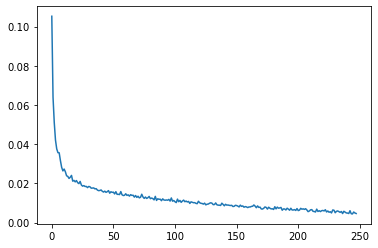

In [267]:
nn = [4, 30, 16, 1]
lr = 0.03

# Por modelo completo

import sklearn as sk
from sklearn import neural_network

model = neural_network.MLPRegressor(solver = 'sgd',
                                    activation= 'tanh',
                                    hidden_layer_sizes= (nn[1:]),
                                    learning_rate_init= lr,
                                    max_iter= 3000)
model.fit(X, Y)
plt.plot(range(len(model.loss_curve_)), model.loss_curve_)
plt.show()

In [281]:
# Por capas
import tensorflow.keras as kr

model = kr.Sequential()

model.add(kr.layers.Dense(nn[1], activation = 'tanh'))
model.add(kr.layers.Dense(nn[2], activation = 'tanh'))
model.add(kr.layers.Dense(nn[3], activation = 'sigmoid'))

model.compile(loss= 'mse', optimizer= kr.optimizers.SGD(lr= 0.03), metrics=['acc'])

model.fit(X, Y, epochs= 100)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 6000 samples
Epoch 1/100
6000/6000 [==============================] - 2s 291us/sample - loss: 0.2131 - acc: 0.6713
Epoch 2/100
6000/6000 [==============================] - 1s 119us/sample - loss: 0.1700 - acc: 0.7788
Epoch 3/100
6000/6000 [==============================] - 1s 122us/sample - loss: 0.1465 - acc: 0.8305
Epoch 4/100
6000/6000 [==============================] - 1s 139us/sample - loss: 0.1278 - acc: 0.8552
Epoch 5/100
6000/6000 [==============================] - 1s 119us/sample - loss: 0.1112 - acc: 0.8770
Epoch 6/100
6000/6000 [==============================] - 1s 142us/sample - loss: 0.0971 - acc: 0.8968
Epoch 7/100
6000/6000 [==============================] - 1s 166us/sample - loss: 0.0858 - acc: 0.9122
Epoch 8/100
6000/6000 [==============================] - 1s 122us/sample - loss: 0.0768 - acc: 0.9175
Epoch 9/100
6000/6000 [==============================] - 1s 129us/sample - loss: 

6000/6000 [==============================] - 1s 115us/sample - loss: 0.0257 - acc: 0.9652
Epoch 77/100
6000/6000 [==============================] - 1s 114us/sample - loss: 0.0264 - acc: 0.9663
Epoch 78/100
6000/6000 [==============================] - 1s 115us/sample - loss: 0.0254 - acc: 0.9663
Epoch 79/100
6000/6000 [==============================] - 1s 118us/sample - loss: 0.0252 - acc: 0.9673
Epoch 80/100
6000/6000 [==============================] - 1s 119us/sample - loss: 0.0254 - acc: 0.9653
Epoch 81/100
6000/6000 [==============================] - 1s 116us/sample - loss: 0.0257 - acc: 0.9663
Epoch 82/100
6000/6000 [==============================] - 1s 118us/sample - loss: 0.0251 - acc: 0.9678
Epoch 83/100
6000/6000 [==============================] - 1s 119us/sample - loss: 0.0253 - acc: 0.9667
Epoch 84/100
6000/6000 [==============================] - 1s 118us/sample - loss: 0.0252 - acc: 0.9663
Epoch 85/100
6000/6000 [==============================] - 1s 121us/sample - loss: 0.02